# Data dependence on g, spectral amplitude (flux) varied

In [53]:
import numpy as np
import random
import time

In [54]:
import sys
import os

In [55]:
import matplotlib
import matplotlib.pyplot as plt

In [56]:
import IPython

In [57]:
import pickle

In [58]:
import swyft

In [59]:
%matplotlib inline

In [60]:
files_name = "simulate_g_values" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
start_dir = os.getcwd()
files_dir = os.getcwd() + "/" + files_name 
store_name = files_name.split("_files")[0] + "_store"
store_dir = os.getcwd() + "/" + files_name + "/" + store_name
sys.path.append(files_dir)

In [61]:
from ALP_quick_sim import ALP_sim

In [62]:
with open(files_dir+"/"+'config_objects.pickle', 'rb') as file:
    config_objects = pickle.load(file)
for key in config_objects.keys():
    locals()[key] = config_objects[key]

with open(files_dir+"/"+'sim_objects.pickle', 'rb') as file:
    sim_objects = pickle.load(file)
for key in sim_objects.keys():
    locals()[key] = sim_objects[key]

with open(files_dir+"/"+'obs_objects.pickle', 'rb') as file:
    obs_objects = pickle.load(file) 
for key in obs_objects.keys():
    locals()[key] = obs_objects[key]

In [63]:
stores={}
samples={}
for g in g_values:    
    store = swyft.ZarrStore(store_dir + "/" + store_name + "_" + str(g).replace('.','-'))
    stores[str(g).replace('.','-')] = store
    samples[g] = store
    print('#samples for g='+str(g)+": " + str(len(samples[g])))

#samples for g=-10000000000: 10
#samples for g=-1.9: 10
#samples for g=-1.4: 10
#samples for g=-1.3: 10
#samples for g=-1.1: 10
#samples for g=-1: 10
#samples for g=-0.9: 10
#samples for g=-0.8: 10
#samples for g=-0.7: 10
#samples for g=-0.4: 10
#samples for g=-0.3: 10
#samples for g=-0.2: 10
#samples for g=0: 10
#samples for g=0.1: 10
#samples for g=0.2: 10
#samples for g=0.3: 10
#samples for g=0.4: 10
#samples for g=0.5: 10
#samples for g=0.7: 10
#samples for g=0.8: 10
#samples for g=1: 10
#samples for g=1.2: 10
#samples for g=1.4: 10
#samples for g=1.8: 10
#samples for g=2: 10


In [66]:
samples[g_values[0]]['params'][:,0]

array([-1.e+10, -1.e+10, -1.e+10, -1.e+10, -1.e+10, -1.e+10, -1.e+10,
       -1.e+10, -1.e+10, -1.e+10], dtype=float32)

In [ ]:
for i in range() len(samples[-np.inf]['data'])

# Visualize observations

Generating new null-hypothesis... 

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


done.


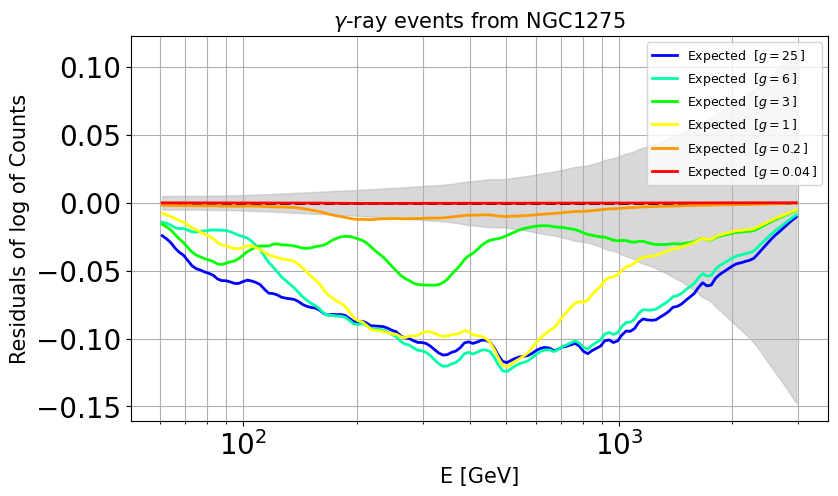

In [67]:
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1)
A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)   
for i,tru in enumerate(truths):
        A.configure_model(params=tru, ALP_seed=0)
        A.compute_case(new_fig=0,plot_obs=0,color=colors[i], color_obs=colors[i],label_exp=1, errorbands=False)
A.configure_model(ALP_seed=None)

# Compare signals to posterior width

In [74]:
widths =[
    [0.1,0.7,2,1.4],
    [-0.9,-0.4,0.3,0.8,1.2,1.8],              #3sig,2sig,peak,truth,2sig,3sig
    [-1.3,-1,-0.2,0.4,0.5,1.2],
    [-1.1,-0.8,0.2,0,1,1.4],
    [g_values[0],g_values[0],-1.4, -0.7,-0.7,-0.3],
    [g_values[0],g_values[0],-1.9,-1.4,-0.8,-0.4],
]

colors_widths = [
    (.6,0,0),
    (.6,.2,0),
    (0,.5,.0),
    (0,0,0),
    (0,.4,.6),
    (0,0,.6),
]

transparency = 0.5

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


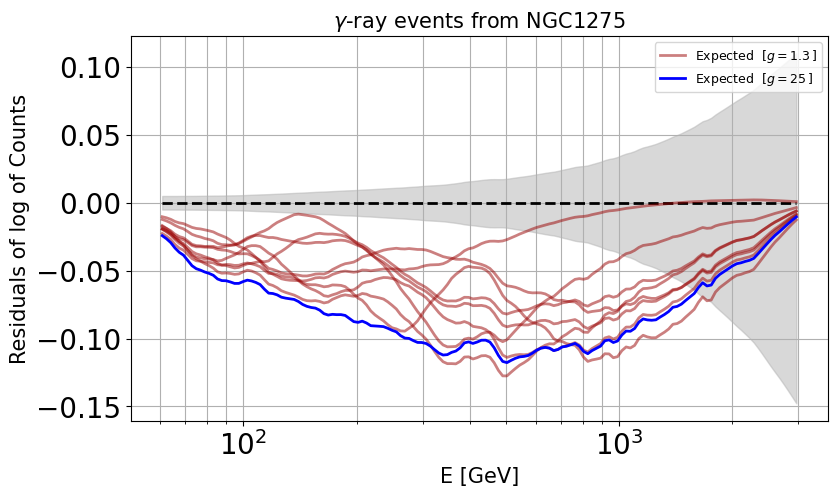

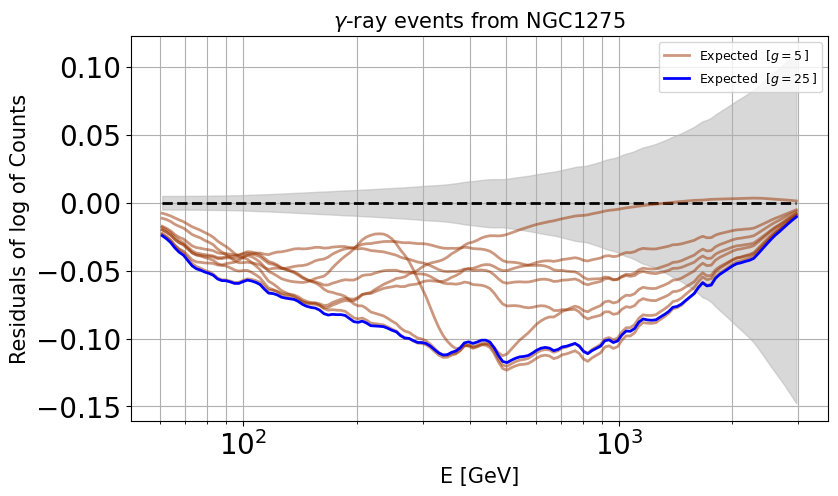

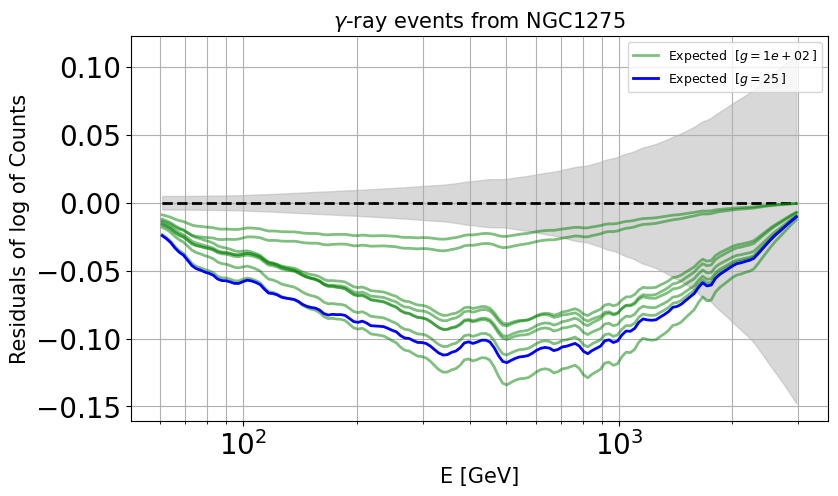

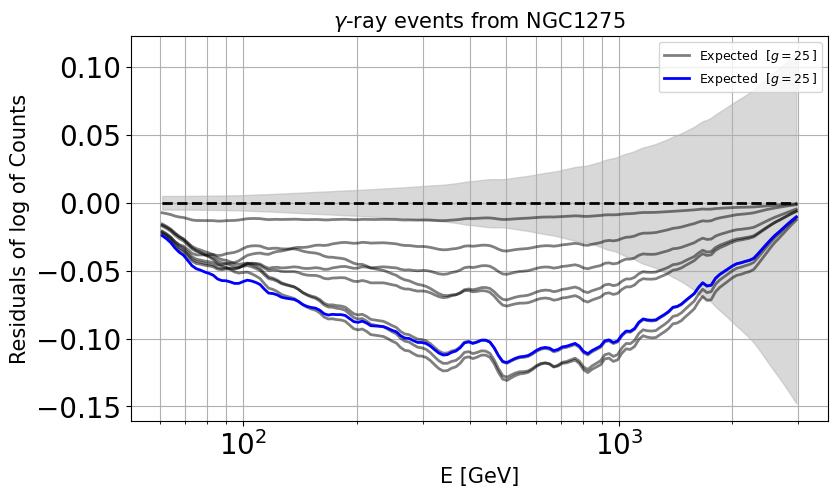

In [75]:
which_truth = 0
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

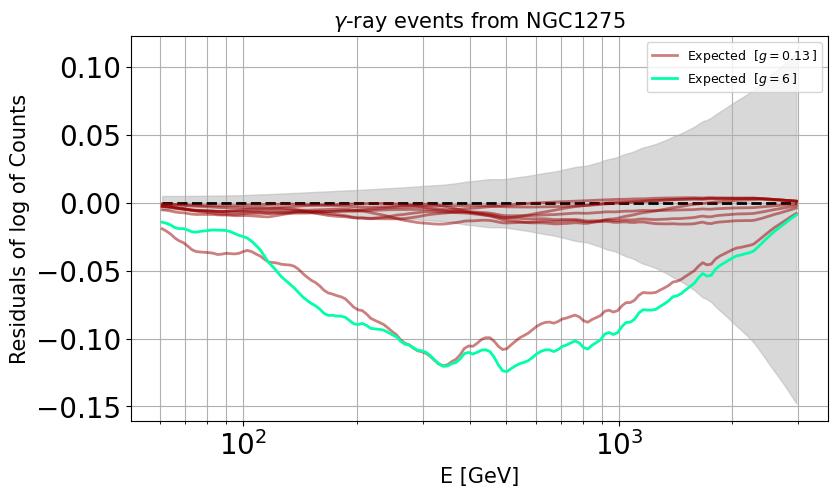

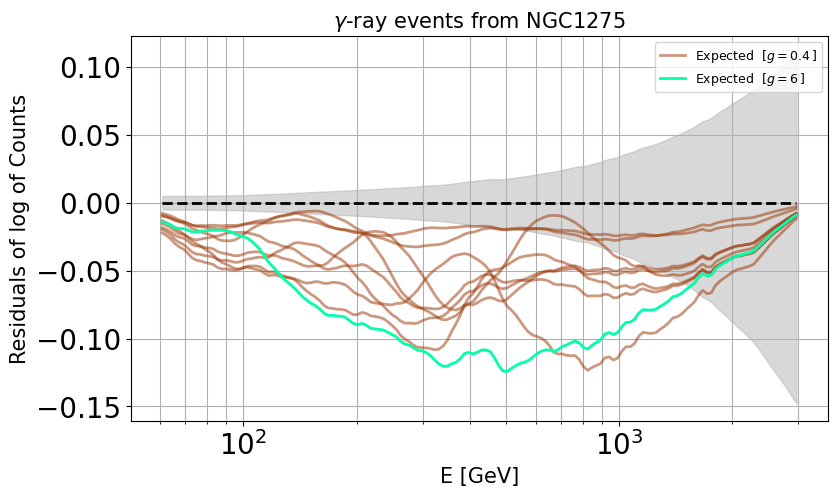

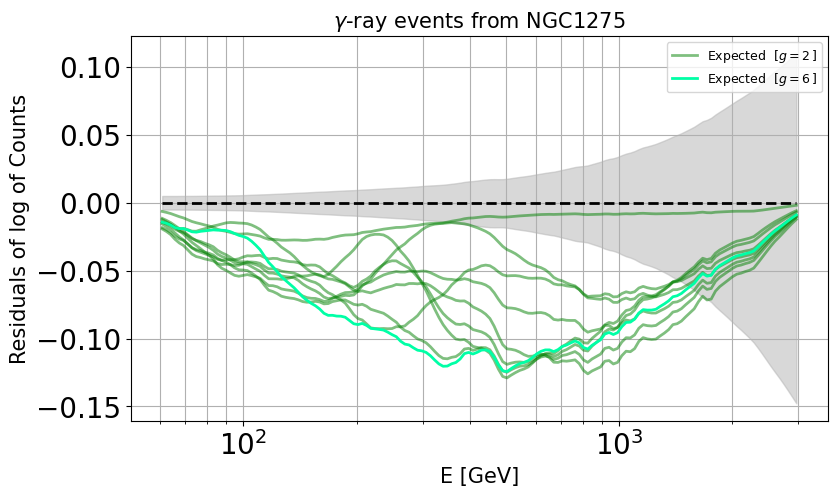

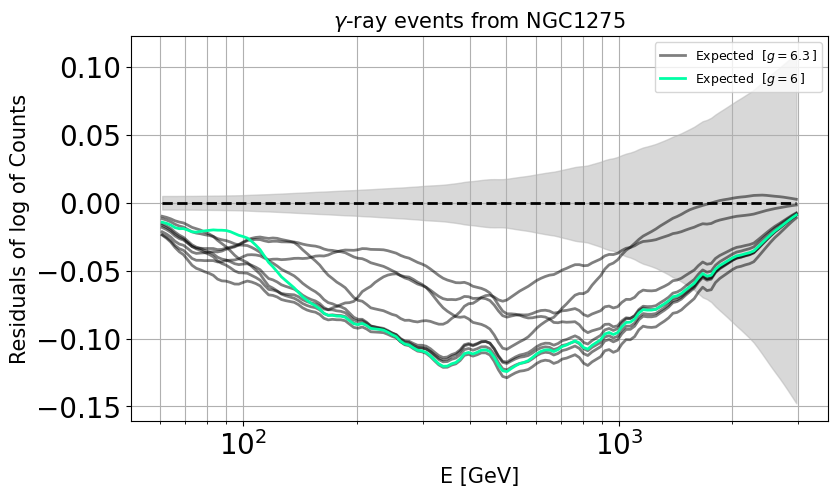

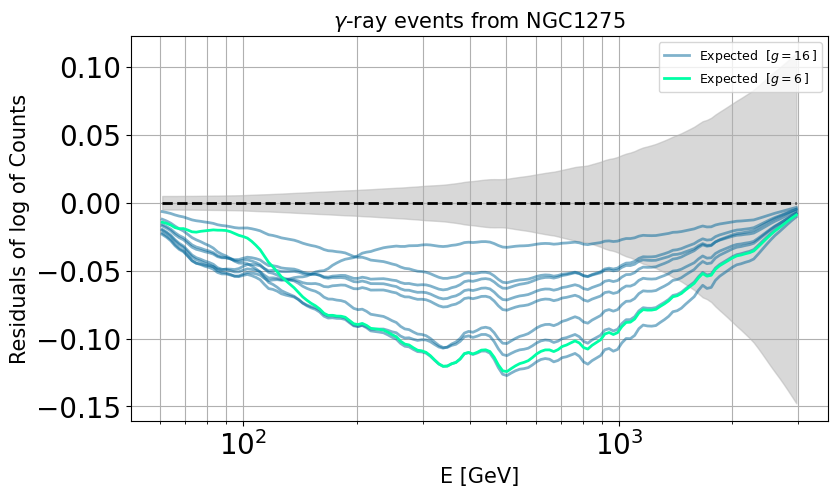

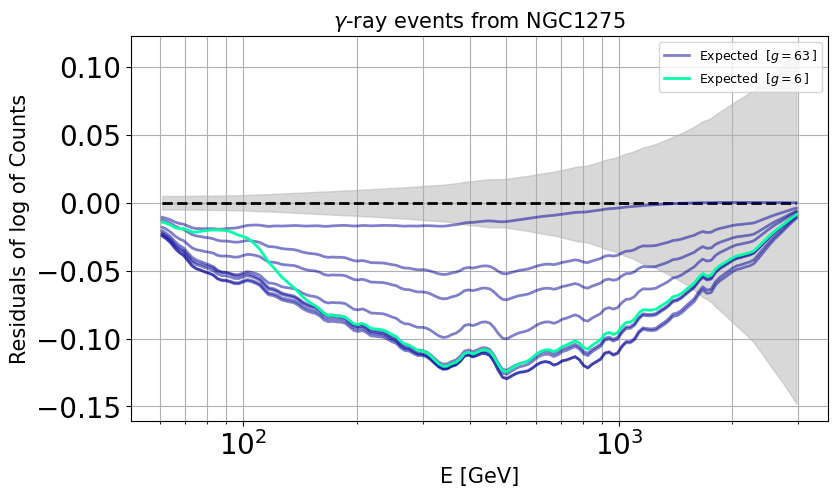

In [76]:
which_truth = 1
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

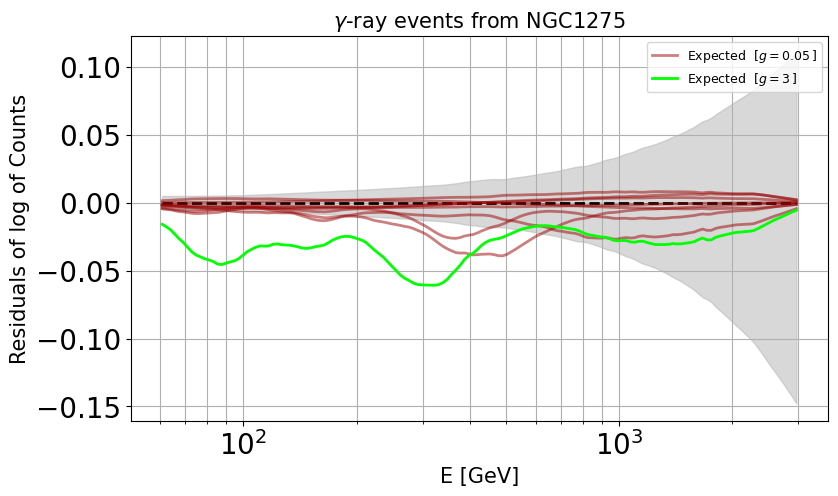

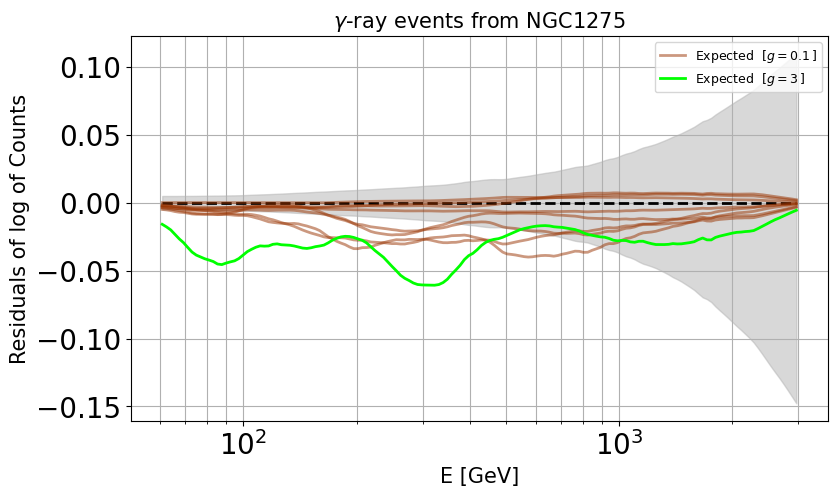

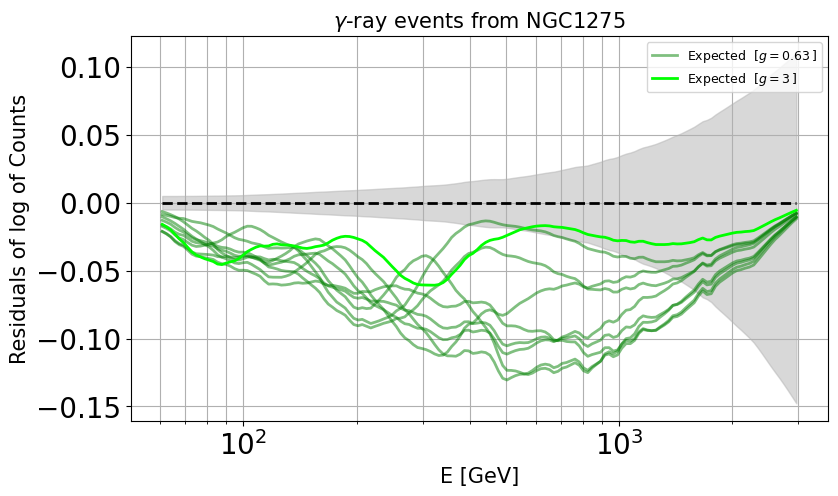

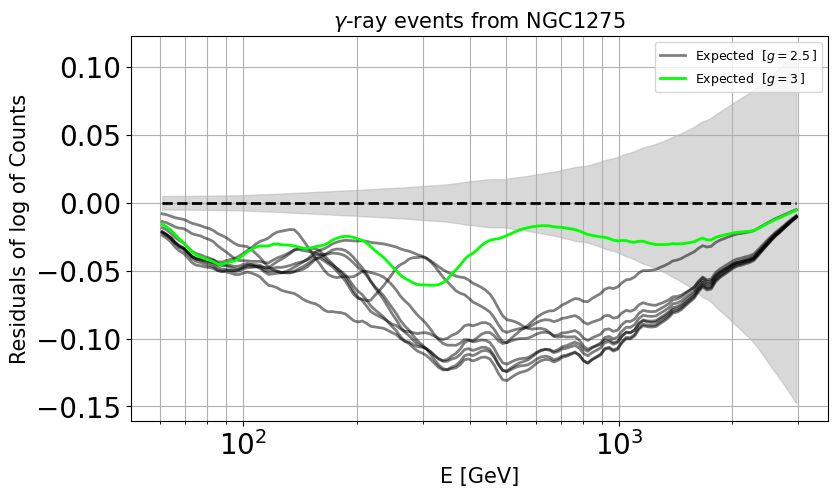

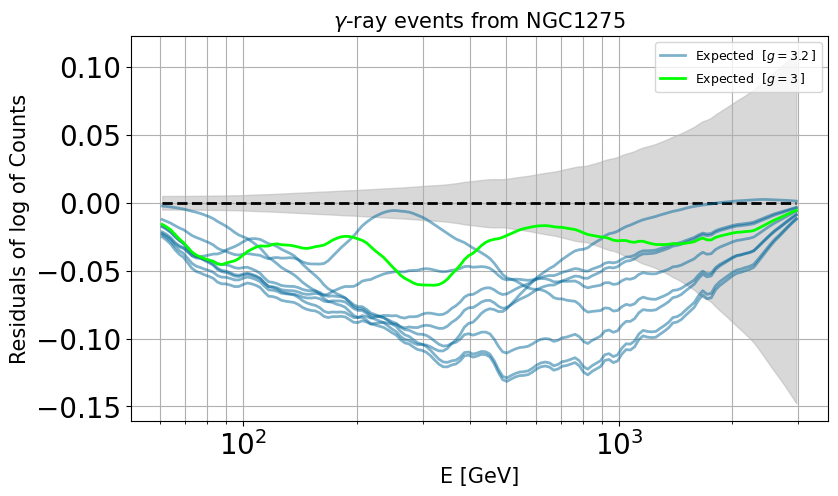

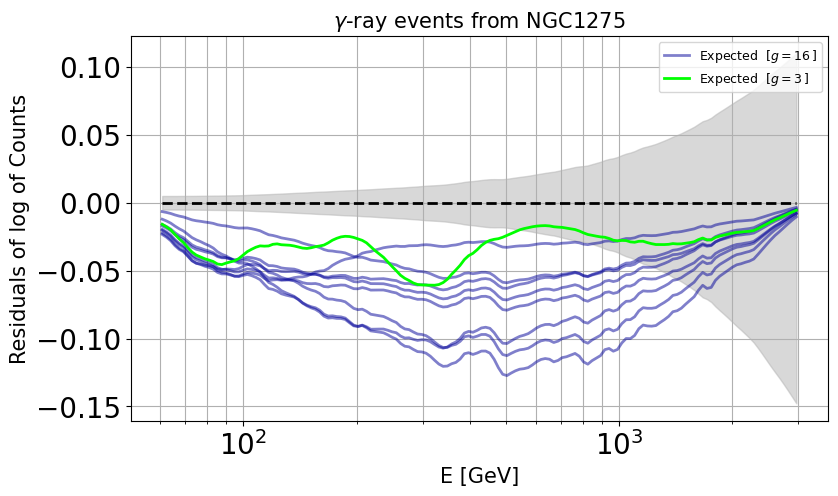

In [77]:
which_truth = 2
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


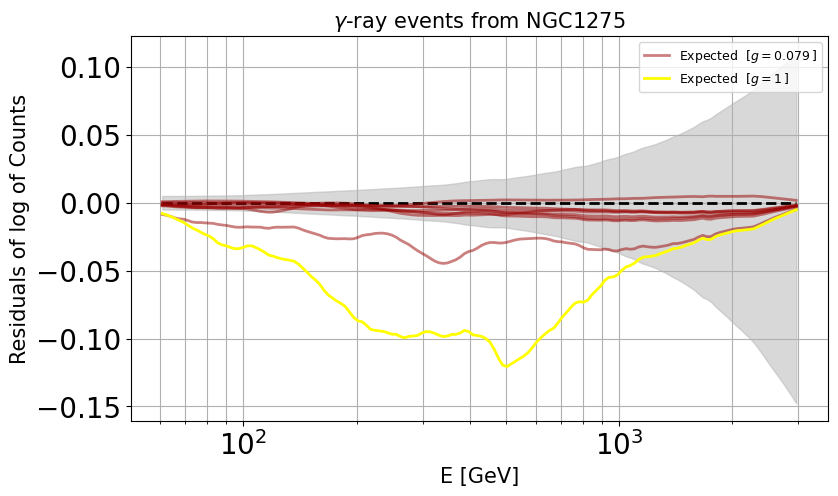

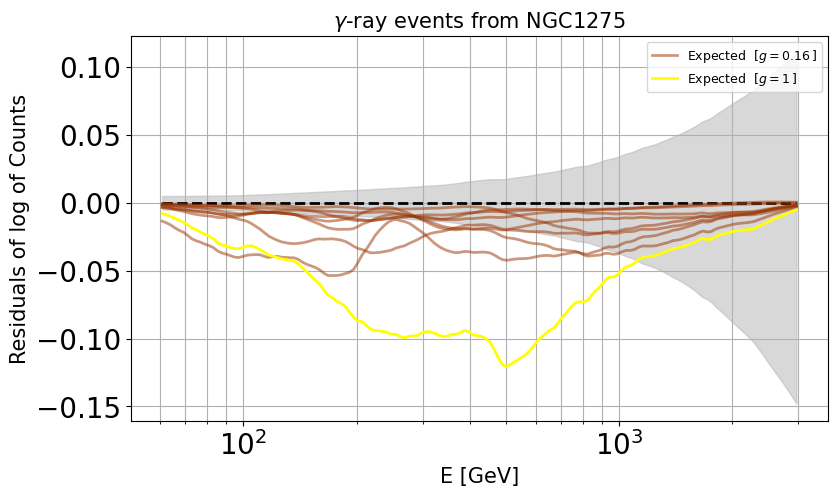

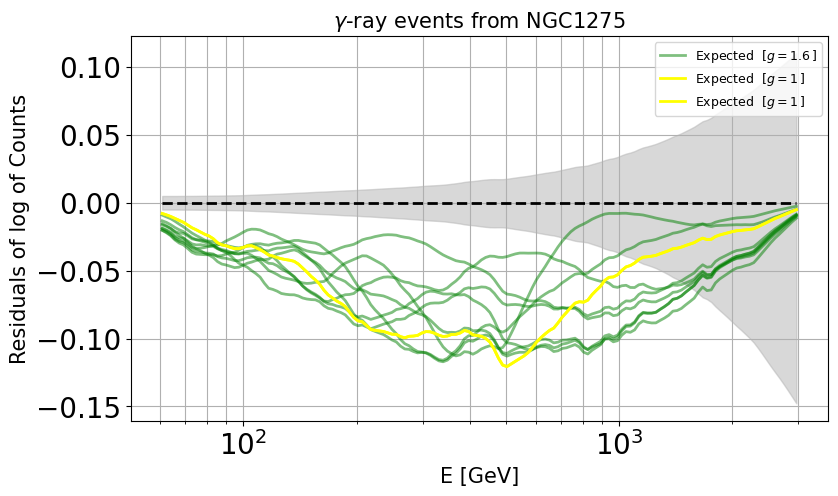

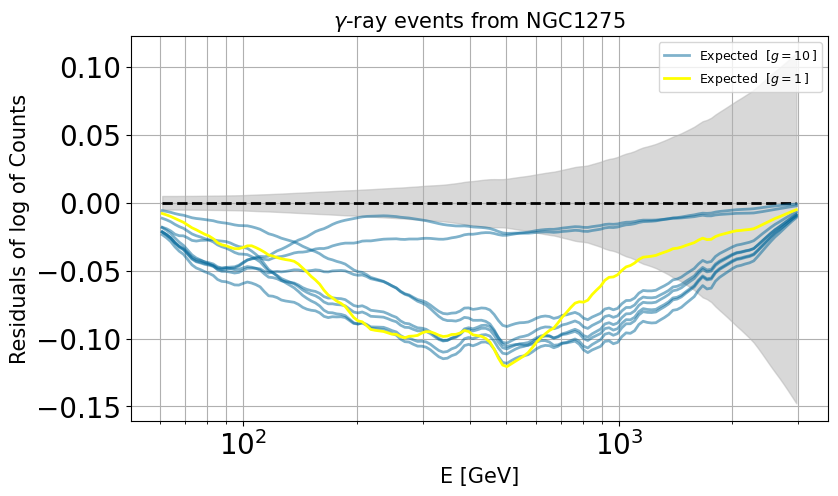

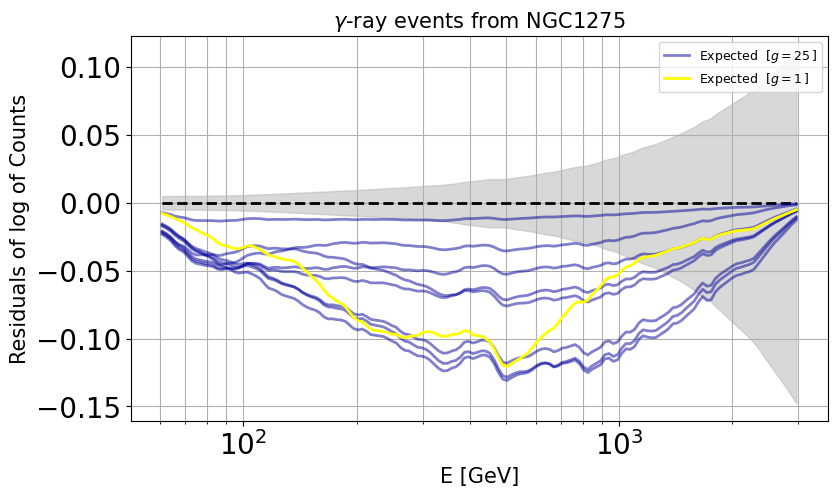

In [78]:
which_truth = 3
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

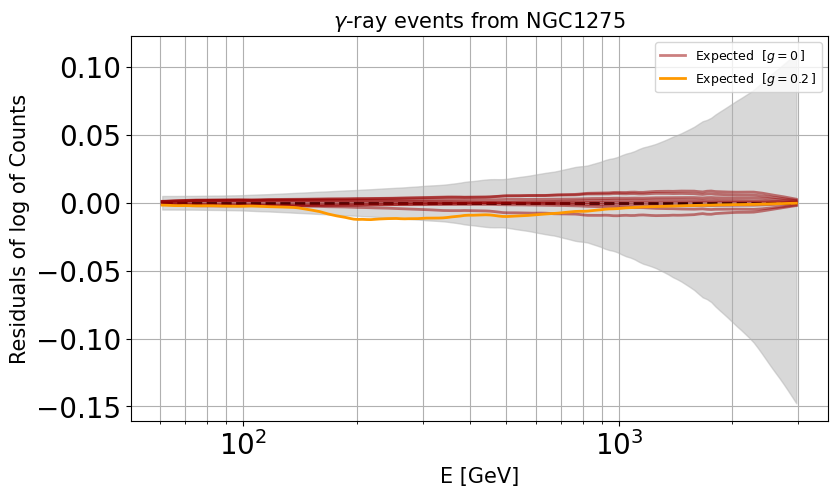

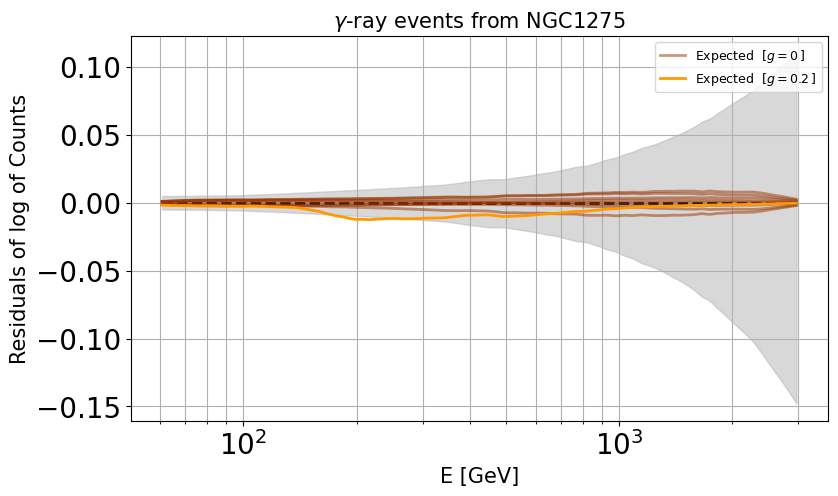

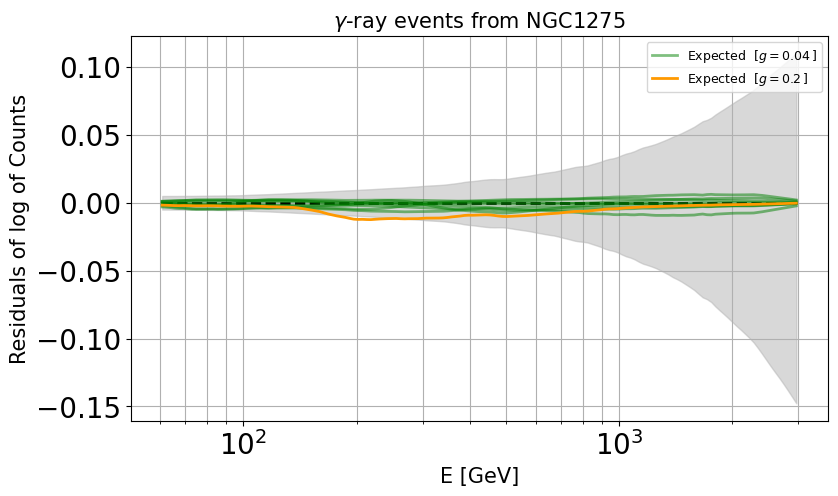

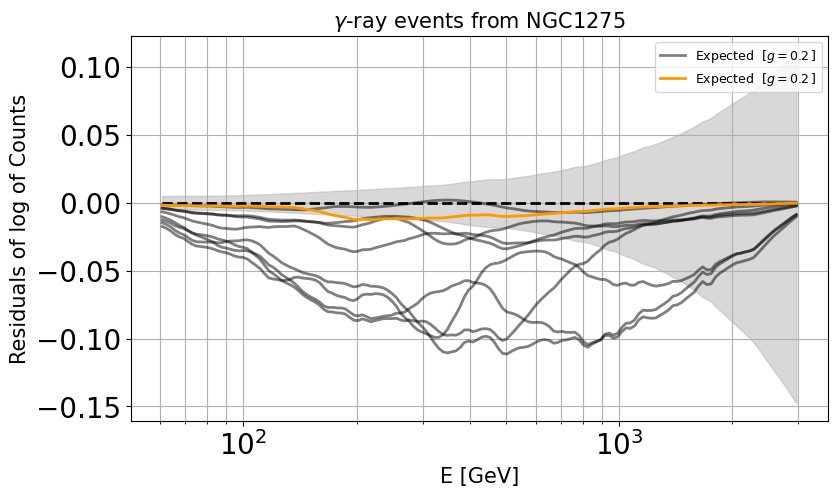

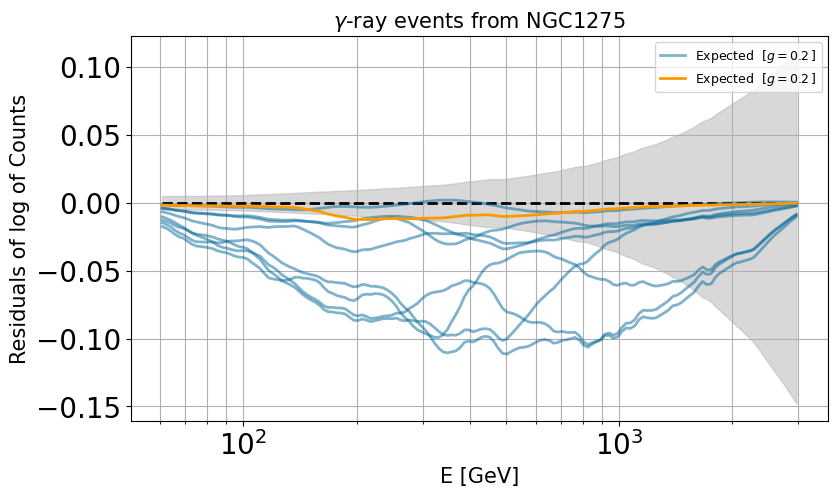

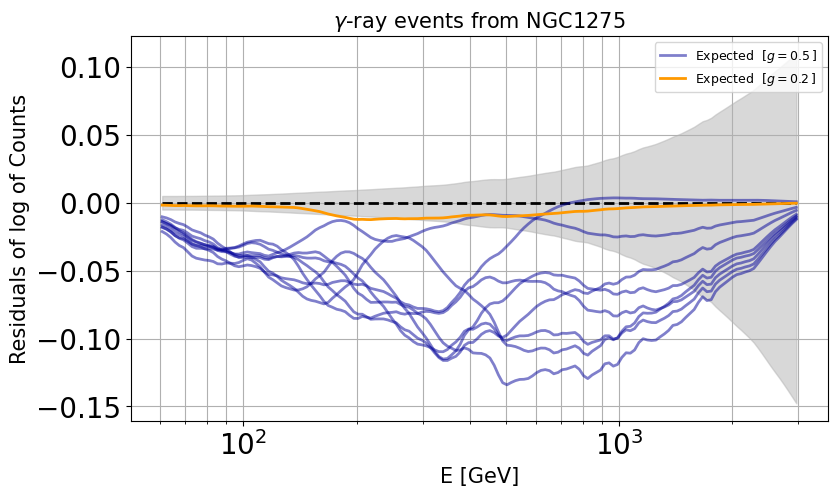

In [79]:
which_truth = 4
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

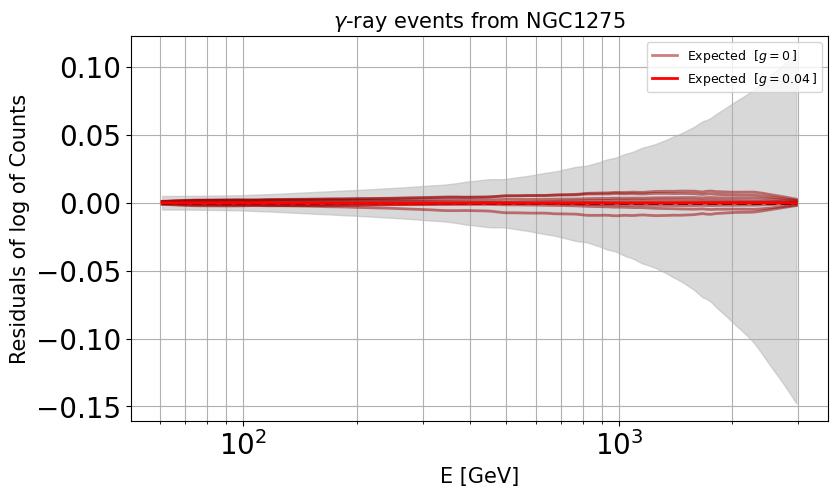

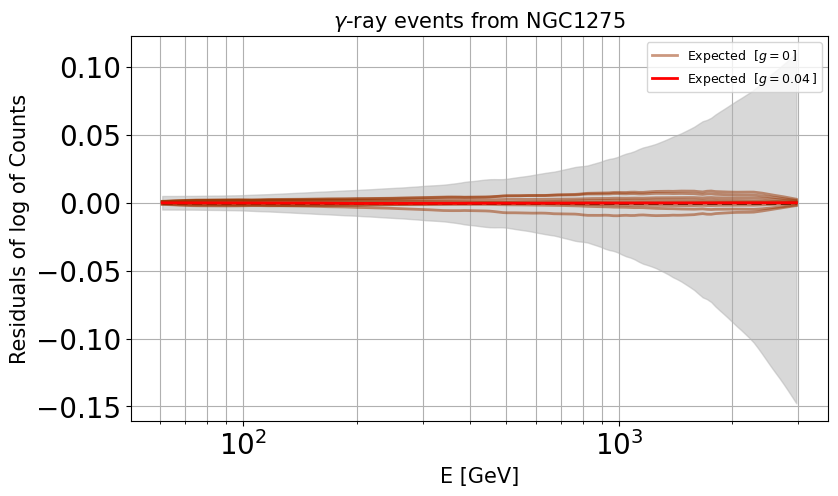

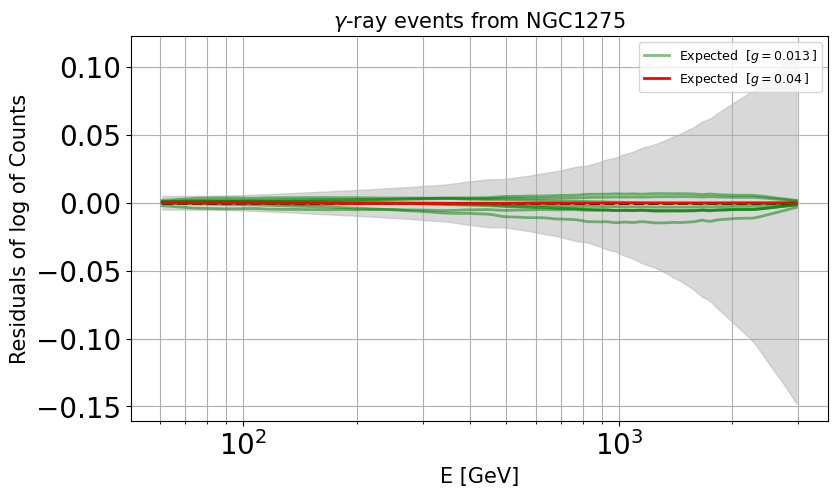

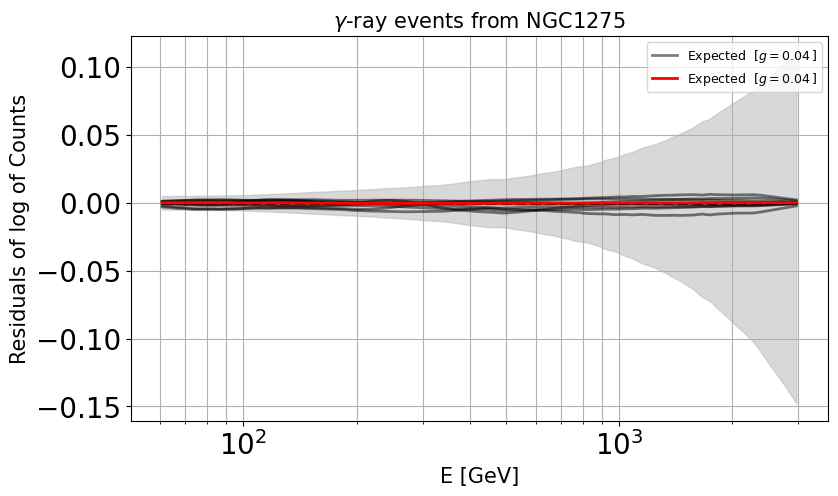

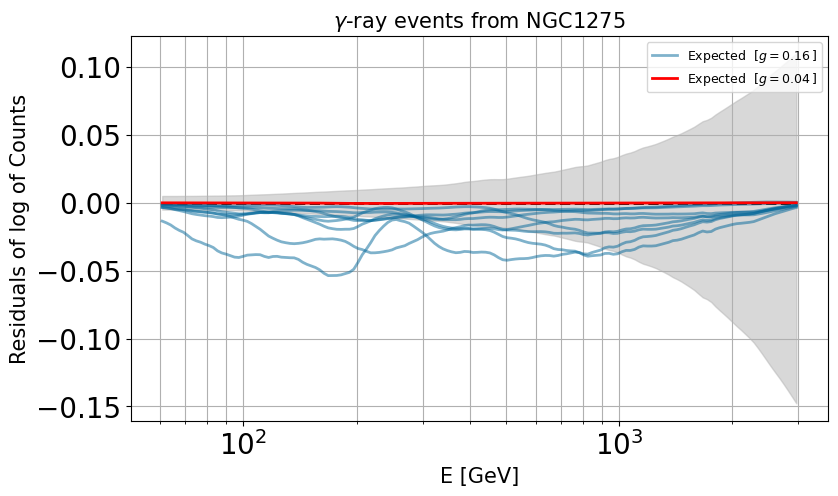

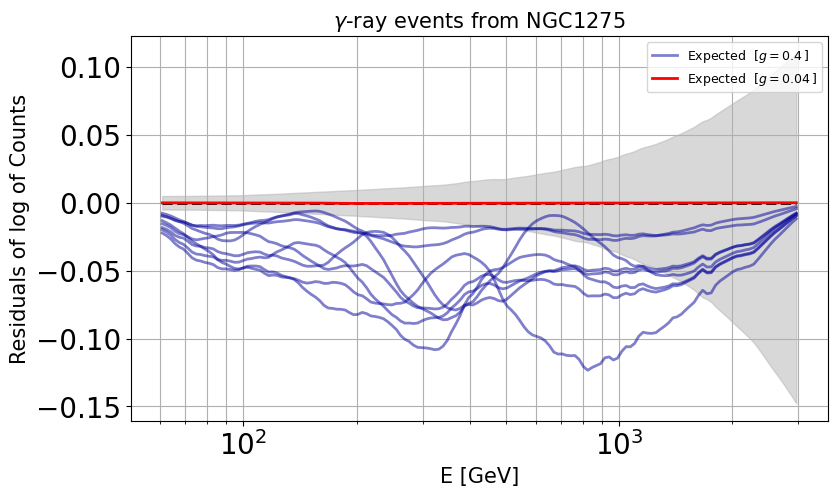

In [80]:
which_truth = 5
n = 8
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
for j,width in enumerate(widths[which_truth:which_truth+1]):
    for i, g in enumerate(width):
        if g:
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency)
        obs = observations[which_truth]
        A.import_counts(obs=obs['data'],exp=obs['exp'])
        A.configure_model(params=obs['params'])
        A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                       errorbands=0, errors=0, plot_obs=0)